In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Read an image and display in a window

In [2]:
# Read an image
img = cv2.imread('/Users/sejongpyo/Downloads/yubi.jpg', 0)
# 1  = cv2.IMREAD_COLOR
# 0  = cv2.IMREAD_GRAYSCALE
# -1 = cv2.IMREAD_UNCHANGED

# Display an image in a window
cv2.imshow('image', img) #'image' = window name
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
    cv2.waitKey(0)
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('test.png', img)
    cv2.destroyAllWindows()

#### Capture video from camera

In [2]:
cap = cv2.VideoCapture(0) # 1 is possible for second cam

# # frame width
# cap.get(3)
# # fame height
# cap.get(4)

# # adjust frame width
# ret = cap.set(3, 320)
# # adjust frame height
# ret = cap.set(4, 240)

while True:
    # Capture frame by frame
    ret, frame = cap.read()
    
    # captured frames come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the capture
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

TypeError: destroyWindow() missing required argument 'winname' (pos 1)

#### Playing video from file

In [ ]:
cap = cv2.VideoCapture('file.name')

while cap.isOpened():
    ret, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray)
    if cv2.waitkey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destoryAllWindows()

#### saving a video

In [ ]:
cap = cv2.VideoCapture(0)

# Define the codec and create videoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('file.avi', fourcc, fps_num, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        out.write(frame)

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destoryAllWindows()

#### drawing Line

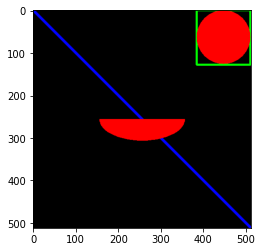

In [32]:
img = np.zeros((512, 512, 3), np.uint8)

# diagonal blue line
img = cv2.line(img, (0, 0), (511, 511), (0, 0, 255), 5)

# draw a rectangle green top-left   top-right
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)

# draw a circle     coordinates center
img = cv2.circle(img, (447, 63), 63, (255, 0, 0), -1)

# (img, (x, y), (major axis length, minor axis length),
#  startAngle, endAngle)
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

plt.imshow(img)

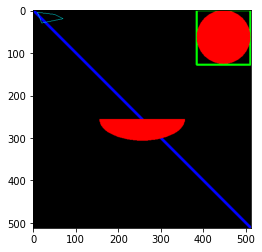

In [33]:
# polygon
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv2.polylines(img, [pts], True, (0, 255, 255))
plt.imshow(img)

#### adding text to Images

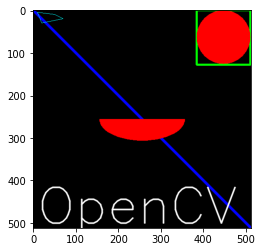

In [35]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font, 4,
            (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)